# **xSoc Python Course** - Week 4

### *File Handling & The Command Line*

🖋️ *Written by Alistair & Tomas from [Warwick AI]()*

This week we will look at various methods of taking input into our python applications and the challenges that come with that.

In this lecture, we will aim to cover:
* File reading
* File writing
* Command line arguments
* Libraries

## File Reading

To read from a file, we need a file to read from.
**Create a file in the same folder as the notebook called "test.txt" and add some text to it.**

Now we will read the file into Python. To do this, we use the ```open()``` function.

The ```open()``` function primarily takes two arguments: **file path** and **mode**

The file path argument is either the relative or absolute path to the file, we will cover the different modes later, but inorder to read text, we use the mode "r"

In [ ]:
test_file = open("Data/test.txt","r")

To read the file, we call ```read()``` on the result of the ```open()``` method. Let's put this in a variable called data for now.

In [ ]:
data = test_file.read()

Now we can print the contents of the file using ```print(data)```

In [ ]:
print(data)

Hooray, we have read from a file!

However let's see what happens if we try to read from the file again.

In [ ]:
data = test_file.read()
print(data)

Notice we don't get anything this time. This is because Python remebers what postion you are at in a file. When we used ```read()``` the first time, we read all the way up to the end of the file so when we call ```read()``` again, we are already at the end so we get nothing!

Think of it like a bookmark. When we read the book, the bookmark is at the end, so when we go to read it again, we find there is nothing left to read.

### Seeking
However, Python allows us to change where the bookmark is using the ```seek()``` method.

The ```seek()``` method takes two arguments: **offset** and **whence**

Offset determines how far forwards or backwards we want to move the bookmark.

Whence determines from where we move the bookmark, the options are:
* 0 Move from the start of the file
* 1 Move from the position of the bookmark
* 2 Move from the end of the file

*Note: for text files, only option 0 is supported. We will come onto the other options later.*

Therefore using ```seek(0,0)``` should bring us back to the start of the file as we're telling Python to put the bookmark 0 places from the start of the file.

In [ ]:
test_file.seek(0,0)

Now let's read in the data and print the results again

In [ ]:
data = test_file.read()
print(data)

We can also try seeking to the middle of the file as so

In [ ]:
test_file.seek(8,0)
data = test_file.read()
print(data)

Lastly, we need to make sure we close the file once we're done with it. This is done using ```close()```

In [ ]:
test_file.close()

Now if we try to read from the file, we will get an error so we can tell that the file is closed.

In [ ]:
test_file.read()

### With ... As
Instead of using file.close() we can also use Python's ```with ... as``` operator.
After using ```with ... as```, we indent our code and once we return from the indent, the file will be closed automatically.

In [ ]:
with open("Data/test.txt","r") as test_file:
    print(test_file.read())

### Binary Files
Python also allows us to read in files as binary. This is done by appending a '**b**' to the mode parameter of the ```open()``` method.

In [ ]:
with open("Data/test.txt","rb") as test_file:
    data = test_file.read()
print(data)
print(data[0])
type(data)

We can see that data is now a **bytes** object. This is useful for processing any filetype that isn't primarily text based, such as images or audio.

Binary files also allow us to seek from the current cursor position or from the end of the file. The offset is the number of bytes to move forwards or backwards in the file.

In [ ]:
with open("Data/test.txt","rb") as test_file:
    test_file.seek(-5,2)
    print(test_file.read())

## File Writing
Now that we have covered reading from files, we now need to try to write to files.

This is done using a different **mode** with the ```open()``` function. The possible modes are as follows:
|Mode|Function|
|---|---|
|'r'|Read from file, error if file doesn't exist|
|'w'|Write to file, will create/overwrite file|
|'x'|Write to file, will error if file exists|
|'a'|Appending to file, will create/overwrite file|
|'b'|Binary mode|
|'t'|Text mode (default)|
|'+'|Allows either writing if used as 'r+' or reading if used as 'w+'|

In this lecture, we will only cover 'w' and 'a', but feel free to explore in your own time!

To begin with, lets open a file called '**test2.txt**' and write some text to it.

*Note we don't need to create the file as Python will do that for us!*

In [ ]:
with open("Data/test2.txt","w") as test_file_2:
    test_file_2.write("Warwick AI is still the best!")

Now go to your file explorer and open the file, you should see that the text has been written to it!

Now let's try that again, but this time use different text.

In [ ]:
with open("Data/test2.txt","w") as test_file_2:
    test_file_2.write("I love reading")

We should see that the file has been overwritten with the new text. In some cases, this is useful, however sometimes we will want to append to the file without overwriting the previous content, for example when writing to an application log.

We can do this using the '**a**' mode. Try appending some text to 'test2.txt'.

In [ ]:
with open("Data/test2.txt","a") as test_file_2:
    test_file_2.write(" and writing files.")

Opening the file in notepad, we see that we have appended text to the original file.

### One Line at a Time
There are many instances where we will want to read a file in parts and process each part separately. For example, if we want to read Comma Separated Values (.csv) files into our program, we will want to read the header line first, then each line individually as each line will contain a new row of data.

#### Example CSV
Name, StudentNumber, Course  
John, 2201234, Biology  
Emma, 2109876, Maths  
Sophie, 2001234, CompSci  
James, 2101234, English  

*Note to make this more readable, I've added in spaces, however usually this would not be the case as they would require removal in the program.*

Fortunately, we can use the ```readline()``` method to do exactly this. First lets open the **test_data.csv** file in **r+** mode so we can read and write to it.

In [ ]:
csv_file = open("Data/test_data.csv","r+")

Let's store the headers of the file in a list called ```headers```. This is done by reading the firstline of the file using the ```readine()```, then split the string by '**,**' since this is a csv file.

Note you may want to use ```.strip('\n')``` to remove the trailing newline from the line.

In [ ]:
headers = csv_file.readline().strip('\n').split(',')
print(headers)

Now lets put the data into a dictionary so that given a name, we can get the society they are in. In order to read all the lines of the file, we can use a ```while``` loop.

Note since once we reach the end of the file, ```readline()``` will return an empty string, we can create a stop condition for the loop.

In [ ]:
data_dict = {}

line = csv_file.readline().strip('\n').split(',')
while not line == ['']:
    data_dict[line[0]] = line[1]
    line = csv_file.readline().strip('\n').split(',')
print(data_dict)

In [ ]:
print(data_dict['Alistair'])

Hopefully you should see that you can now access the data that was in the csv file using the dictionary. This is just a simple example of how we can use Python to parse CSV files into data structures that are more useful for us as programmers.

Let's also try writing a new line to the file. Unfortunately, Python doesn't have a ```writeline()``` method. However we can use the ```write()``` method to write a new line by prepending a '**\n**' to our string. 

Write your name and society into the file, note you will need to use the csv format.

In [ ]:
csv_file.write("\nAlistair,WAI")

Now close the file and open it in the editor to see if it has changed.

In [ ]:
csv_file.close()

## Command Line Arguments
Now we will cover one final useful way of getting input into our program, specifically programs run from the command line.

Command line arguments are passed into a program when you run it from the command line and can pass using data into the program or affect the behaviour by specifing certain conditions.

For example, running the command **python -c "<python_code>"** will run the python code using python, but running **python -V** will print the current version of python.

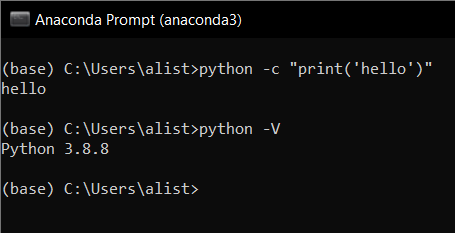

Using command line arguments to take input can allow us to create powerful scripts that are suited to a particular task. If you have any experience with Linux or any other command line, you will know how useful command line programs can be, and Python provides the ability to create such programs.

Due to the way Notebooks are run, we will have to create a new Python script in order to demonstrate how command line arguments work, however all the syntax will still be explained here.

First, you will need to import the **system** library using ```import sys```. This will allow us to access the command line arguments passed to the script.

Using ```sys.argv```, we can access the command line arguments. Note that ```sys.argv``` is actually a list, so we can access indiviual arguments using ```sys.argv[0]```, ```sys.argv[1]```, etc.

Access and print out the first command line argument.

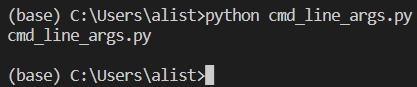

You should notice that the path of the script you are running is printed. The first command line argument is always the path to the script, so there is always one command line argument. Any additional arguments will be in the 2nd index and above.

Let's take in a username as our first additional argument. Set a ```username``` variable to ```sys.argv[1]``` and print out a greeting to the user. Remember when you run the script, you will need to run it as ```python <script_name> <username>```.

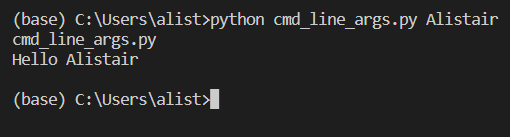

Now let's add two optional arguments, **-u** which makes the name uppercase and **-r** which reverses the name. Create two variables to store the potential options. Note that since they are optional, we need to check the length of ```sys.argv``` to see how many arguments have been passed.

Use an ```if``` statement to check the length of ```sys.argv``` and set the option variables to the optional arguments if they exist.

Lastly, we don't want order to matter with the optional arguments, so use another ```if``` statement with the ```or``` operator to check both optional variables for **-u** or **-r**.

To set the username to uppercase, use ```user_name.upper()```

To reverse the username, you can use techniques from week 3.

Finally, print out the greeting with the modified username. Test out the script with a different arguments and see if it works.

For example, ```python <script> Alistair -u -r``` should return ```Hello RIATSILA```

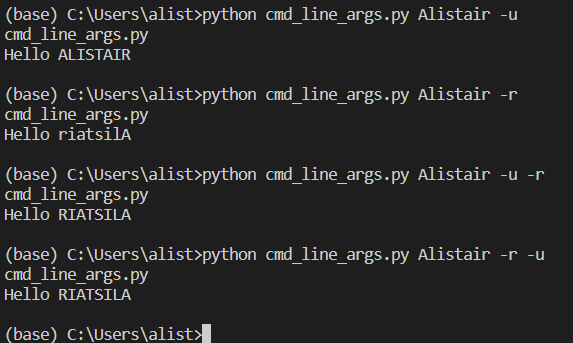

## Libraries
We have already used libraries, however it is useful to know exactly what they are.

Libraries are a bunch of classes and functions related to a certain funtionality. For example, the ```sys``` library used in the previous section allows us to interact with the system, hence why we can use it to get the command line arguments.

Libraries are very useful as they allow us to access powerful functions without having to write lots of code ourselves!

To install a new library, we have to use the ```pip``` commandline command. Go to the terminal and use ```pip help``` to see the options.
|Command|Description|
|-------|--------|
|```pip install <library name>```|Installs a library|
|```pip list```|Lists installed libraries|
|```pip uninstall <library name>```|Uninstalls a library|

To test this, go to the terminal and use ```pip install emoji``` to install the emoji library which allows us to print emojis in our code.

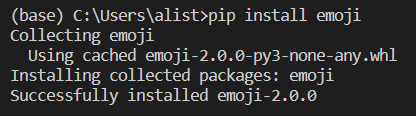

To import a library into your code, use ```import <library>``` at the top of the script. Sometimes libraries contain multiple classes and you'll only need to use one, in this case, you can use ```from <library> import <class>``` just to import the required class.

In this case, use ```from emoji import emojize``` to import the required functionality.  
Then use ```print(':thumbs_up:')```

In [ ]:
from emoji import emojize
print(emojize(":thumbs_up:"))

You should hopefully see that we have printed the thumbs up emoji. This is just a small example, but libraries can provide a lot of useful functionality, and almost all large programs will require external libraries.

Lots of libraries have documentation webpages online, so if you import a library, it's useful to check the documentation to see how various functions work and what arguments they take. 

Once you can use libraries effectively, a lot of cool functionality becomes really accessible. Libraries can allow you to do anything from running webservers to interacting with hardware to training machine learning models, so it's a good idea to spend some time playing around with them!

🖋️ ***This week was written by Alistair & Tomas from [Warwick AI]()***